In [ ]:
!pip install openai pandas

   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ------------------- -------------------- 0.5/1.1 MB 2.5 MB/s eta 0:00:01
   -------------------------------------- - 1.0/1.1 MB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 1.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   --------------- ------------------------ 0.8/2.0 MB 4.7 MB/s eta 0:00:01
   ------------------------- -------------- 1.3/2.0 MB 3.6 MB/s eta 0:00:01
   ------------------------------------ --- 1.8/2.0 MB 2.9 MB/s eta 0:00:01
   ---------------------------------------- 2.0/2.0 MB 2.7 MB/s eta 0:00:00

   ---------- ----------------------------- 2/8 [pydantic-core]
   -------------------- ------------------- 4/8 [distro]
   ------------------------- -------------- 5/8 [annotated-types]
   ------------------------------ --------- 6/8 [pydantic]
   -----------


[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install python-dotenv 


[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
!pip install tiktoken

   ---------------------------------------- 0.0/879.1 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/879.1 kB ? eta -:--:--
   ----------------------------------- ---- 786.4/879.1 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 879.1/879.1 kB 1.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
import openai
import pandas as pd
import tiktoken
import os
import json
from dotenv import load_dotenv
from IPython.display import Markdown, display
from openai import OpenAI

In [8]:
load_dotenv(override=True)
api_key = os.getenv('OPENAI_API_KEY')

In [ ]:
# Check the key

if not api_key:
    print("No API key was found - please head over to the troubleshooting notebook in this folder to identify & fix!")
elif not api_key.startswith("sk-proj-"):
    print("An API key was found, but it doesn't start sk-proj-; please check you're using the right key - see troubleshooting notebook")
elif api_key.strip() != api_key:
    print("An API key was found, but it looks like it might have space or tab characters at the start or end - please remove them - see troubleshooting notebook")
else:
    print("API key found and looks good so far!")

API key found and looks good so far!


In [15]:
openai = OpenAI(api_key=api_key)

response = openai.chat.completions.create(
    model="gpt-4",           # or "gpt-3.5-turbo" if cheaper
    messages=[
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": full_prompt}
    ] #,
    # temperature=0,           # deterministic labels
    # max_tokens=1000
)


RateLimitError: Error code: 429 - {'error': {'message': 'Request too large for gpt-4 in organization org-LSCziUBNiO82SFGilcJmgMqd on tokens per min (TPM): Limit 10000, Requested 68989. The input or output tokens must be reduced in order to run successfully. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'tokens', 'param': None, 'code': 'rate_limit_exceeded'}}

In [ ]:
csv_input = pd.read_csv(r"C:\Users\pasup\projects\yelp_dataset\Data\sample_reviews.csv")

enc = tiktoken.encoding_for_model("gpt-4")  # or "gpt-3.5-turbo"

def count_tokens(text):
    return len(enc.encode(text))

# Example: calculate total tokens for a batch of reviews
reviews = csv_input  # list of review strings
total_tokens = sum(count_tokens(r) for r in reviews)
print(f"Total tokens in batch: {total_tokens}")

Total tokens in batch: 274335


You have 274,335 tokens in your 600 reviews, which is way above GPT‑4’s per-request limit (max 8k tokens for standard GPT‑4, 32k if you have the 32k context). Even GPT‑3.5-Turbo (4k tokens max) can’t handle this in a single request.

In [18]:
MAX_TOKENS_PER_REQUEST = 3000  # safe for GPT-4 standard

In [19]:
import tiktoken

enc = tiktoken.encoding_for_model("gpt-4")

def count_tokens(text):
    return len(enc.encode(text))

def chunk_reviews_by_tokens(reviews, max_tokens=3000):
    chunks = []
    current_chunk = []
    current_tokens = 0

    for review in reviews:
        review_tokens = count_tokens(review)
        if current_tokens + review_tokens > max_tokens:
            chunks.append(current_chunk)
            current_chunk = []
            current_tokens = 0
        current_chunk.append(review)
        current_tokens += review_tokens

    if current_chunk:
        chunks.append(current_chunk)

    return chunks

# Suppose `reviews` is your list of 600 reviews
chunks = chunk_reviews_by_tokens(reviews, MAX_TOKENS_PER_REQUEST)
print(f"Total chunks: {len(chunks)}")


Total chunks: 92


In [ ]:
# Load CSV properly
df = pd.read_csv(r"C:\Users\pasup\projects\yelp_dataset\Data\sample_reviews.csv")

# If your CSV only has 'review', create an 'id' column
df['id'] = df.index + 1  # simple numeric IDs starting from 1

# Convert to list of dicts
reviews = df[['id', 'review']].to_dict(orient='records')

print(reviews[:5])


[{'id': 1, 'review': "Third time is the straw. My order was missing the main topping. Salami of all things! You would think I would learn. Unfortunately I order through the app and this is the store I am required to use. The manager was not interested at ALL in fixing the problem! It didn't show on their end so not their problem! Screw customer service! I say screw them. Cold day in hell, before I order from them again!"}, {'id': 2, 'review': "It use to be good food I always order there. two large cheese pizza and the whole thing was burnt I didn't even call them because they don't care. This is the second time I won't be coming here anymore going to Antonio's pizza"}, {'id': 3, 'review': "Please don't go and waste your money. They should be ashamed of themselves. It's bad enough the food is overpriced but it's horrible to boot. Everything was served cold and over salted. The lobster mac and cheese was dry, their lobster tails were huge oysters from the gulf - poor quality ingredients 

In [35]:
df

,review,id
0,Third time is the straw. My order was missing ...,1
1,It use to be good food I always order there. t...,2
2,Please don't go and waste your money. They sho...,3
3,I came in around 2:30pm on a Saturday and orde...,4
4,Service has gone to the bottom. This particula...,5
...,...,...
595,Every single thing we ate was amazing! And the...,596
596,A Chinatown gem -- I will be overjoyed if we e...,597
597,"This review is for food, service, and ambiance...",598
598,"Incredible food, great experience, environment...",599


In [47]:
# Define system prompt and base user prompt (your version)
system_prompt = """
You are an annotation assistant creating high-quality NLP training data.
You ALWAYS return JSON arrays ONLY, with keys: id, review, label, confidence.
Do NOT include explanations or extra text.
"""

base_user_prompt = """
TASK
Classify customer review sentences from CSV input into EXACTLY ONE label per row:
- Complaint | Suggestion | Neutral

CSV INPUT FORMAT
Expect CSV with columns: id,review
Example:
id,review
1,The waiter was rude and service was slow
2,You should add more vegan options
3,Nice ambiance and friendly staff

LABEL DEFINITIONS
Complaint:
- Dissatisfaction, negative experience, problems, issues, delays, poor quality, frustration
- Implicit complaints: "waited 30 minutes", "food arrived cold", "not as expected"
- ANY negative mention overrides praise
- Sarcasm/irony counts as Complaint

Suggestion:
- Advice, requests improvements, recommendations
- Trigger words: "should", "could", "wish" + improvement, "recommend", "better if"

Neutral:
- Praise only, factual statements without emotion, positive opinions without improvement requests
- NO dissatisfaction
- Fragments/typos/empty → Neutral

EDGE CASE RULES
1. Sarcasm/irony → Complaint
2. Mixed praise + ANY negative → Complaint 
3. "Wish" + improvement → Suggestion
4. Empty/short/unclear → Neutral
5. "Problems/issues" without positive resolution → Complaint

OUTPUT EXAMPLE:
[
  {"id": "1", "review": "The waiter was rude...", "label": "Complaint", "confidence": 0.95},
  {"id": "2", "review": "You should add...", "label": "Suggestion", "confidence": 0.92}
]

NOW CLASSIFY THE CSV DATA PROVIDED BELOW:
"""

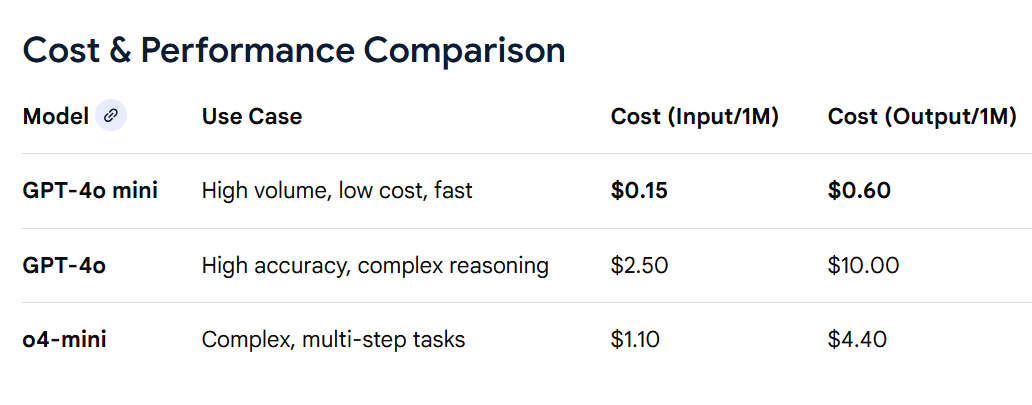

In [ ]:
# Setup tiktoken for GPT-4
enc = tiktoken.encoding_for_model("gpt-4")

def count_tokens(text):
    return len(enc.encode(text))

# Chunk reviews based on tokens (max ~3000 per chunk)
MAX_TOKENS = 3000

def chunk_reviews(reviews, max_tokens=MAX_TOKENS):
    chunks = []
    current_chunk = []
    current_tokens = 0
    for r in reviews:
        review_text = r['review']
        tokens = count_tokens(review_text)
        if current_tokens + tokens > max_tokens:
            chunks.append(current_chunk)
            current_chunk = []
            current_tokens = 0
        current_chunk.append(r)
        current_tokens += tokens
    if current_chunk:
        chunks.append(current_chunk)
    return chunks

chunks = chunk_reviews(reviews)
print(f"Total chunks: {len(chunks)}")


# Iterate over chunks and call GPT-4
all_results = []

for i, chunk in enumerate(chunks):
    # Prepare CSV input for this chunk
    csv_lines = ["id,review"]
    for r in chunk:
        csv_lines.append(f"{r['id']},{r['review'].replace(',', ' ')}")
    csv_text = "\n".join(csv_lines)

    user_prompt = base_user_prompt + "\n" + csv_text

    openai = OpenAI(api_key=api_key)
    
    response = openai.chat.completions.create(
        model="gpt-4",
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": user_prompt}
        ],
        temperature=0
    )
    chunk_result = response.choices[0].message.content

    
    # Convert JSON string to Python list
    all_results.extend(json.loads(chunk_result))

    print(f"Processed chunk {i+1}/{len(chunks)}")


pd.DataFrame(all_results).to_csv("annotated_reviews.csv", index=False)
print("Annotation complete, saved to annotated_reviews.csv")


Total chunks: 21
Processed chunk 1/21
Processed chunk 2/21
Processed chunk 3/21
Processed chunk 4/21
Processed chunk 5/21
Processed chunk 6/21
Processed chunk 7/21
Processed chunk 8/21
Processed chunk 9/21
Processed chunk 10/21
Processed chunk 11/21
Processed chunk 12/21
Processed chunk 13/21
Processed chunk 14/21
Processed chunk 15/21
Processed chunk 16/21
Processed chunk 17/21


RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}

In [44]:
all_results_df = pd.DataFrame(all_results)

In [45]:
all_results_df.to_csv(r"C:\Users\pasup\projects\yelp_dataset\Data\annotated_reviews.csv", index=False)